### Titanic Passenger Survival ML Classification Model 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Titanic Dataset

In [2]:
path_data_set = r"C:\Users\ragha\Project_Titanic\ML_Research\titanic.csv"

In [3]:
df_titanic = pd.read_csv(path_data_set)

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### EDA

In [5]:
# Count the numbers of rows and columns in the data set.
df_titanic.shape

(891, 12)

In [6]:
#Descriptive Statistics on the numerical columns.
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Count the number of passengers survived.
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

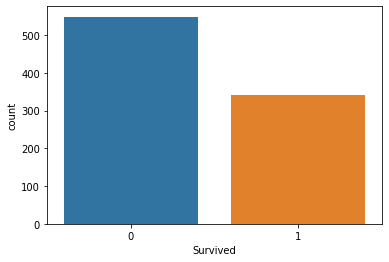

In [8]:
# Visualize the survivors.
sns.countplot(df_titanic.Survived)

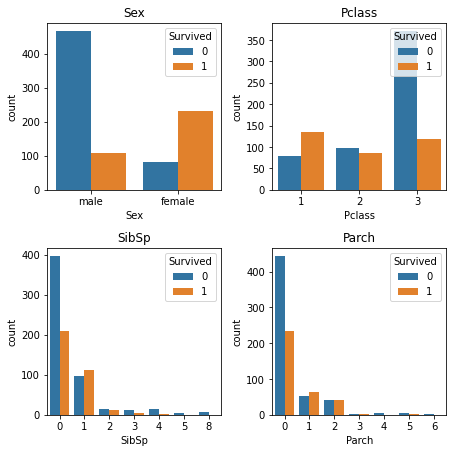

In [9]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for rdx in range(0, n_rows):
    for cdx in range(0, n_cols):
        idx = rdx * n_cols + cdx
        ax = axs[rdx][cdx]
        sns.countplot(df_titanic[cols[idx]], hue=df_titanic['Survived'], ax=ax)
        ax.set_title(cols[idx])
        ax.legend(title = 'Survived', loc = 'upper right')
plt.tight_layout()

In [10]:
# Survival Rate of male and female.
df_titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
# Survival rate by sex and Pclass.
df_titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

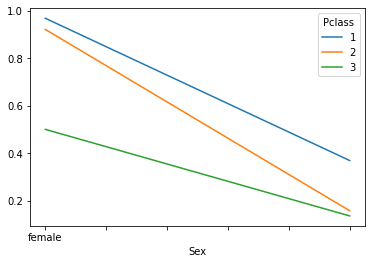

In [12]:
# Visualize survival rate by sex and Pclass.
df_titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

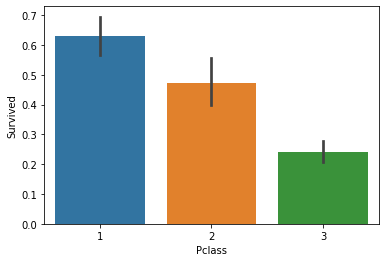

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df_titanic)

In [14]:
# Survival rate by sex, age and Pclass.
age = pd.cut(df_titanic['Age'], [0, 20, 80])
df_titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 20]   0.928571  1.000000  0.510638
       (20, 80]  0.971831  0.896552  0.418182
male   (0, 20]   0.571429  0.526316  0.197368
       (20, 80]  0.382979  0.062500  0.129944

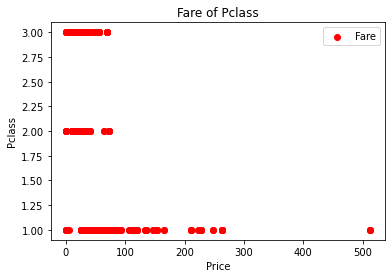

In [15]:
# Plot fare for each Pclass.
plt.scatter(df_titanic['Fare'], df_titanic['Pclass'], color='red', label='Fare')
plt.ylabel('Pclass')
plt.xlabel('Price')
plt.title('Fare of Pclass')
plt.legend()
plt.show()

In [16]:
# Missing values in each column.
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Get count of each column values.
for value in df_titanic:
    print(df_titanic[value].value_counts())
    print()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Dick, Mrs. Albert Adrian (Vera Gillespie)        1
Hamalainen, Mrs. William (Anna)                  1
Andersson, Miss. Sigrid Elisabeth                1
Collander, Mr. Erik Gustaf                       1
Appleton, Mrs. Edward Dale (Charlotte Lamson)    1
                                                ..
Moor, Mrs. (Beila)                               1
Minahan, Dr. William Edward                      1
Celotti, Mr. Francesco                           1
Nysten, Miss. Anna Sofia                         1
Fox, Mr. Stanley Hubert                          1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.

In [18]:
# drop missing values and redundent columns.
df_titanic = df_titanic.dropna(subset = ['Age'])
df_titanic = df_titanic.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [19]:
df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,0,3,female,39.0,0,5,29.125,Q
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
889,1,1,male,26.0,0,0,30.000,C
890,0,3,male,32.0,0,0,7.750,Q


In [20]:
df_titanic.shape

(714, 8)

In [21]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [49]:
# Converting categorical data into numerical data.

df_titanic.Sex = pd.get_dummies(df_titanic.Sex, drop_first=True)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_titanic.iloc[:, 7] = labelencoder.fit_transform(df_titanic.iloc[:, 7].astype(str))

df_titanic.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
885,0,3,0,39.0,0,5,29.125,1
886,0,2,1,27.0,0,0,13.000,2
887,1,1,0,19.0,0,0,30.000,2
889,1,1,1,26.0,0,0,30.000,0
890,0,3,1,32.0,0,0,7.750,1


In [23]:
df_titanic.dtypes

Survived      int64
Pclass        int64
Sex           uint8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

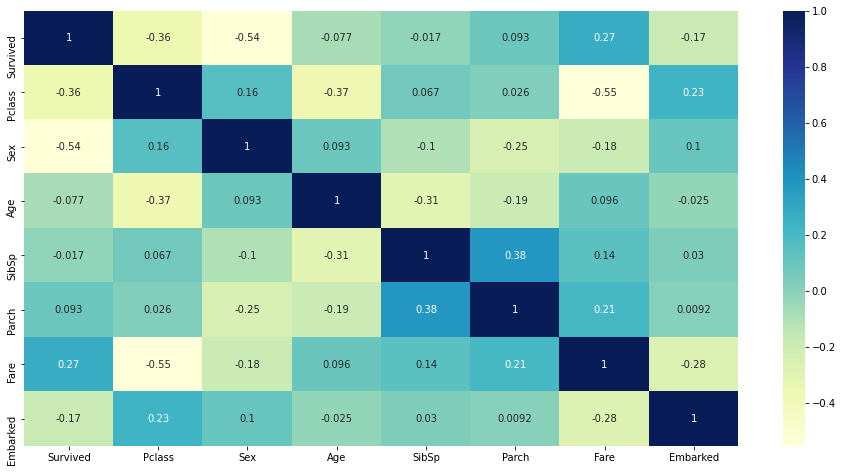

In [24]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_titanic.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [25]:
# Split the data into independent and dependent variables.
X = df_titanic.iloc[:, 1:]
Y = df_titanic.iloc[:, 0]

In [26]:
# Split the data into 70% training and 0% testing.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

#### Checking class imbalance

In [27]:
Y_test.value_counts()

0    94
1    49
Name: Survived, dtype: int64

In [28]:
# Scale the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
# Function for ML models.
def models(X_train, Y_train):
    
    # logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    # SVC
    from sklearn.svm import SVC
    svc_linear = SVC(kernel='linear', random_state=0)
    svc_linear.fit(X_train, Y_train)
    
    # GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # DT
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    # RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42, class_weight={0:1,1:2})
    rf.fit(X_train, Y_train)
    
    # XGBoost Classifier
    from xgboost import XGBClassifier
    xgb = XGBClassifier()
    xgb.fit(X_train, Y_train)
    
    print('Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('SVC Linear Training Accuracy: ', svc_linear.score(X_train, Y_train))
    print('Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('Random Forest Training Accuracy: ', rf.score(X_train, Y_train))
    print('XGBoost Training Accuracy: ', xgb.score(X_train, Y_train))
    
    return log, svc_linear, gauss, rf, xgb
    

In [30]:
model = models(X_train, Y_train)

C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:19:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Logistic Regression Training Accuracy:  0.7968476357267951
SVC Linear Training Accuracy:  0.7758318739054291
Gaussian NB Training Accuracy:  0.7968476357267951
Random Forest Training Accuracy:  0.9667250437828371
XGBoost Training Accuracy:  0.9737302977232924


#### Based on the model performance with default params, lets explore the xgboost and randonforest in a bit detail using gridsearch. 

In [44]:
from sklearn import model_selection

# hyperparameter tuning with XGBoost
# creating a KFold object 
folds = 10

# specify range of hyperparameters
param_grid = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.6, 0.8], 
             'subsample': [0.1, 0.3, 0.6, 0.9],
             'scale_pos_weight': [0.5, 1, 3, 6, 9]}          

# specify model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=3, n_jobs=1, n_estimators=100)


from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1 .........
[20:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1, total=   0.1s
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1 .........
[20:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ragha\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1 .........
[20:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1 .........
[20:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.1 .........
[20:31:36] WA

[20:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.6 .........
[20:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=0.5, subsample=0.6 .........
[20:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src

[20:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=1, subsample=0.1 ...........
[20:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=1, subsample=0.1 ...........
[20:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  learning_rate=0.05, scale_pos_weight=1, subsample=0.6, total=   0.1s
[CV] learning_rate=0.05, scale_pos_weight=1, subsample=0.6 ...........
[20:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=1, subsample=0.6, total=   0.1s
[CV] learning_rate=0.05, scale_pos_weight=1, subsample=0.6 ...........
[20:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=1, subsample=0.6, total=   0.1s
[CV] learning

[CV]  learning_rate=0.05, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=3, subsample=0.1 ...........
[20:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=3, subsample=0.1 ...........
[20:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning

[CV] learning_rate=0.05, scale_pos_weight=3, subsample=0.6 ...........
[20:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=3, subsample=0.6 ...........
[20:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=3, subsample=0.6 ...........
[20:31:40] WARNIN

[CV] learning_rate=0.05, scale_pos_weight=6, subsample=0.1 ...........
[20:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=6, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=6, subsample=0.1 ...........
[20:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=6, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=6, subsample=0.1 ...........
[20:31:41] WARNIN

[20:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=6, subsample=0.6 ...........
[20:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=6, subsample=0.6 ...........
[20:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  learning_rate=0.05, scale_pos_weight=9, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=9, subsample=0.1 ...........
[20:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=9, subsample=0.1, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=9, subsample=0.1 ...........
[20:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=9, subsample=0.1, total=   0.0s
[CV] learning

[20:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=9, subsample=0.6 ...........
[20:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.05, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.05, scale_pos_weight=9, subsample=0.6 ...........
[20:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[20:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=0.5, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=0.5, subsample=0.1 ..........
[20:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=0.5, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=0.5, subsample=0.1 ..........
[20:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/l

[CV]  learning_rate=0.1, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=0.5, subsample=0.6 ..........
[20:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=0.5, subsample=0.6 ..........
[20:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learn

[CV] learning_rate=0.1, scale_pos_weight=1, subsample=0.1 ............
[20:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=1, subsample=0.1, total=   0.1s
[CV] learning_rate=0.1, scale_pos_weight=1, subsample=0.1 ............
[20:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=1, subsample=0.3 ............
[20:31:46] WARNING:

[20:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=1, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=1, subsample=0.6 ............
[20:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=1, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=1, subsample=0.6 ............
[20:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[20:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=3, subsample=0.1 ............
[20:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=3, subsample=0.3 ............
[20:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV] learning_rate=0.1, scale_pos_weight=3, subsample=0.6 ............
[20:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=3, subsample=0.6 ............
[20:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=3, subsample=0.9 ............
[20:31:48] WARNING:

[20:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=6, subsample=0.1, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=6, subsample=0.3 ............
[20:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=6, subsample=0.3 ............
[20:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV]  learning_rate=0.1, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=6, subsample=0.6 ............
[20:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=6, subsample=0.9 ............
[20:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_ra

[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=9, subsample=0.3 ............
[20:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=9, subsample=0.3 ............
[20:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_ra

[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=9, subsample=0.9 ............
[20:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_rate=0.1, scale_pos_weight=9, subsample=0.9 ............
[20:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.1, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_ra

[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.3 .........
[20:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.3 .........
[20:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.3 .........
[20:31:52] WA

[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.9 .........
[20:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.9 .........
[20:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=0.5, subsample=0.9 .........
[20:31:53] WA

[20:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=1, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=1, subsample=0.3 ...........
[20:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=1, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=1, subsample=0.3 ...........
[20:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV] learning_rate=0.15, scale_pos_weight=1, subsample=0.9 ...........
[20:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=1, subsample=0.9 ...........
[20:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=1, subsample=0.9 ...........
[20:31:54] WARNIN

[20:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=3, subsample=0.3 ...........
[20:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=3, subsample=0.3 ...........
[20:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  learning_rate=0.15, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=3, subsample=0.9 ...........
[20:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=3, subsample=0.9 ...........
[20:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning

[20:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=6, subsample=0.3 ...........
[20:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=6, subsample=0.3 ...........
[20:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV] learning_rate=0.15, scale_pos_weight=6, subsample=0.9 ...........
[20:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=6, subsample=0.9 ...........
[20:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=6, subsample=0.9 ...........
[20:31:58] WARNIN

[20:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=9, subsample=0.3 ...........
[20:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=9, subsample=0.6 ...........
[20:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/lea

[CV]  learning_rate=0.15, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_rate=0.15, scale_pos_weight=9, subsample=0.9 ...........
[20:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=9, subsample=0.9, total=   0.1s
[CV] learning_rate=0.15, scale_pos_weight=9, subsample=0.9 ...........
[20:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.15, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning

[CV]  learning_rate=0.2, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=0.5, subsample=0.6 ..........
[20:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=0.5, subsample=0.6 ..........
[20:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=0.5, subsample=0.6, total=   0.0s
[CV] learn

[CV] learning_rate=0.2, scale_pos_weight=1, subsample=0.1 ............
[20:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=1, subsample=0.1 ............
[20:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=1, subsample=0.1 ............
[20:32:01] WARNING:

[CV]  learning_rate=0.2, scale_pos_weight=1, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=1, subsample=0.6 ............
[20:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=1, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=1, subsample=0.6 ............
[20:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=1, subsample=0.6, total=   0.0s
[CV] learning_ra

[20:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=3, subsample=0.1 ............
[20:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=3, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=3, subsample=0.1 ............
[20:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV]  learning_rate=0.2, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=3, subsample=0.6 ............
[20:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=3, subsample=0.6 ............
[20:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=3, subsample=0.6, total=   0.0s
[CV] learning_ra

[20:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=6, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=6, subsample=0.1 ............
[20:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=6, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=6, subsample=0.1 ............
[20:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV] learning_rate=0.2, scale_pos_weight=6, subsample=0.6 ............
[20:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=6, subsample=0.6 ............
[20:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=6, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=6, subsample=0.6 ............
[20:32:05] WARNING:

[CV] learning_rate=0.2, scale_pos_weight=9, subsample=0.1 ............
[20:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=9, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=9, subsample=0.1 ............
[20:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=9, subsample=0.1, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=9, subsample=0.3 ............
[20:32:06] WARNING:

[20:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=9, subsample=0.6 ............
[20:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.2, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.2, scale_pos_weight=9, subsample=0.9 ............
[20:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[20:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=0.5, subsample=0.3 ..........
[20:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=0.5, subsample=0.3 ..........
[20:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/l

[CV]  learning_rate=0.6, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=0.5, subsample=0.9 ..........
[20:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=0.5, subsample=0.9 ..........
[20:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learn

[20:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=1, subsample=0.1, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=1, subsample=0.3 ............
[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=1, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=1, subsample=0.3 ............
[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=1, subsample=0.9 ............
[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=1, subsample=0.9 ............
[20:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[20:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=3, subsample=0.3 ............
[20:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=3, subsample=0.3 ............
[20:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[20:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=3, subsample=0.9 ............
[20:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=3, subsample=0.9 ............
[20:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.3 ............
[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.3 ............
[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.3 ............
[20:32:12] WARNING:

[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.9 ............
[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.9 ............
[20:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=6, subsample=0.9 ............
[20:32:12] WARNING:

[CV]  learning_rate=0.6, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=9, subsample=0.3 ............
[20:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=9, subsample=0.3 ............
[20:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=9, subsample=0.3, total=   0.0s
[CV] learning_ra

[CV] learning_rate=0.6, scale_pos_weight=9, subsample=0.9 ............
[20:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_rate=0.6, scale_pos_weight=9, subsample=0.9 ............
[20:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.6, scale_pos_weight=9, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=0.5, subsample=0.1 ..........
[20:32:14] WARNING:

[CV]  learning_rate=0.8, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=0.5, subsample=0.3 ..........
[20:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=0.5, subsample=0.3 ..........
[20:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=0.5, subsample=0.3, total=   0.0s
[CV] learn

[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=0.5, subsample=0.9 ..........
[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=0.5, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=0.5, subsample=0.9 ..........
[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/l

[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=1, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=1, subsample=0.3 ............
[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=1, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=1, subsample=0.3 ............
[20:32:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV]  learning_rate=0.8, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=1, subsample=0.9 ............
[20:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=1, subsample=0.9 ............
[20:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=1, subsample=0.9, total=   0.0s
[CV] learning_ra

[CV]  learning_rate=0.8, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=3, subsample=0.3 ............
[20:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=3, subsample=0.3 ............
[20:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=3, subsample=0.3, total=   0.0s
[CV] learning_ra

[CV] learning_rate=0.8, scale_pos_weight=3, subsample=0.9 ............
[20:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=3, subsample=0.9 ............
[20:32:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=3, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=3, subsample=0.9 ............
[20:32:18] WARNING:

[CV]  learning_rate=0.8, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=6, subsample=0.3 ............
[20:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=6, subsample=0.3 ............
[20:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=6, subsample=0.3, total=   0.0s
[CV] learning_ra

[20:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=6, subsample=0.9 ............
[20:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=6, subsample=0.9, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=6, subsample=0.9 ............
[20:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learn

[CV]  learning_rate=0.8, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=9, subsample=0.6 ............
[20:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_rate=0.8, scale_pos_weight=9, subsample=0.6 ............
[20:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  learning_rate=0.8, scale_pos_weight=9, subsample=0.6, total=   0.0s
[CV] learning_ra

[20:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   45.7s finished


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, vali

In [47]:
model_cv.best_score_

0.8161222020568664

#### RandomForest 

In [31]:
from sklearn.ensemble import RandomForestClassifier

#### Hyper-parameter tuning for the Random Forest. I have used class_weight as 1:2 to tackle the class imbalance issue.

In [34]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight={0:1,1:2})

#### Define params. 

In [35]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

#### Using RandomizedSearchCV and recall as a scoring criteria.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=rf,
                           param_distributions=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [41]:
%%time
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.1s finished


Wall time: 12.5 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight={0: 1, 1: 2},
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50, 100,
                                                             200],
                                        'n_estimators': [10, 25, 50, 100]},
                   scoring='accuracy', verbose=1)

In [42]:
print("Best model on the training dataset: ", grid_search.best_score_)

Best model on the training dataset:  0.7670785659801679


##### Based on the performance, the model with default  parameters of xgboost classifier has performed better.

In [101]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[79 15]
 [12 37]]
Model[0] Testing Accuracy = "0.8111888111888111"

[[78 16]
 [13 36]]
Model[1] Testing Accuracy = "0.7972027972027972"

[[77 17]
 [13 36]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[88  6]
 [18 31]]
Model[3] Testing Accuracy = "0.8321678321678322"

[[80 14]
 [16 33]]
Model[4] Testing Accuracy = "0.7902097902097902"



<AxesSubplot:xlabel='features'>

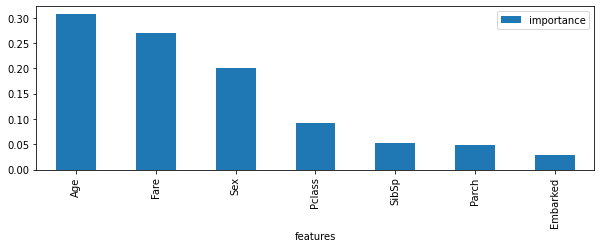

In [102]:
# Features Importance
rf = model[3]
importances = pd.DataFrame({'features': df_titanic.iloc[:, 1:].columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('features')
importances.plot.bar(figsize=(10, 3))

In [48]:
import pickle
# open a file, where you want to store the data

# Change the model file path
path_model = r"C:\Users\ragha\Project_Titanic\titanic_rf.pkl"
file = open(path_model, 'wb')

# dump information to that file
pickle.dump(model_cv, file)

In [115]:
model = open(r'C:\Users\ragha\Project_Titanic\titanic_rf.pkl','rb')
forest = pickle.load(model)

In [116]:
# Print the prediction of the random forest classifier
pred = forest.predict(X_test)
print(pred)
print()
print(Y_test.values)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0]

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0]


In [117]:
from sklearn import metrics
metrics.r2_score(Y_test, pred)

0.3480243161094223